# Part-1 : Word Embedding

## I - Utiliser un modèle existant

    a) Télécharger un modèle pré-entrainé word2vec-google-news-300. 

In [2]:
%pip install gensim
%pip install bs4
%pip install nltk
%pip install html5lib
%pip install lxml


  Using cached gensim-4.2.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached scipy-1.9.1-cp39-cp39-win_amd64.whl (38.6 MB)
  Using cached Cython-0.29.28-py2.py3-none-any.whl (983 kB)
  Using cached smart_open-6.2.0-py3-none-any.whl (58 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [26]:
import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

    b) Vérifier si mon prénom est réprésenté par un vecteur


In [ ]:
word2vec_model["Vincent"]

Mon prénom est bien réprésenté par un vecteur.

    c) Quel est le mot le plus similaire à mon prénom ? Cela me paraît-il logique ?

In [36]:
word2vec_model.most_similar("Vincent")[:1]

[('Joseph', 0.6987809538841248)]

Le mot le plus similaire avec mon prénom est "Joseph".
Cela me semble logique au vu du fait que c'est également un prénom, mais je ne vois pas forcément le rapport entre les deux car si on regarde les naisances avec ses deux prénoms, ce n'est pas du tout la même époque.

    d) Le mot "computer" est-il similaire au mot "software" ?

In [4]:
word2vec_model.similarity("computer", "software")

0.54441094

La similarité est supérieur à 50% (0,54 soit 54%) donc on peut en conclure que les deux mots sont similaires.

    e) Quels sont les 5 mots les plus similaires au mot "computer" ?

In [7]:
word2vec_model.most_similar("computer")[:5]

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.647333562374115),
 ('com_puter', 0.6082080006599426)]

Les 5 mots les plus similaires au mot "computer" sont dans l'ordre de similarité :
- "computers" -> 80% de similarité
- "laptop" -> 66% de similarité
- "laptop_computer" -> 65,5% de similarité
- "Computer" -> 65% de similarité
- "com_puter" -> 61% de similarité


    f) Parmi ces mots [“computer”, “software”, “intelligence”, “engineering”], trouver
    l’intrus (celui qui ne correspond pas vraiment) ?

In [6]:
word2vec_model.doesnt_match("computer software intelligence engineering".split())

'intelligence'

L'intrus est : "intelligence".

    g) A l'aide d'une opération sémantique, trouver :

- La monnaie indienne

In [24]:
word2vec_model.most_similar(positive=["India", "euros"], negative=["France"])[:1]

[('rupees', 0.7108319997787476)]

La monnaie indienne est les "Rupees", soit les "Roupies" en français.

- Le participe passé du verbe "buy"

In [16]:
word2vec_model.most_similar(positive=["gone", "buy"], negative=["go"])[:1]

[('bought', 0.7196015119552612)]

Le participe passé de "buy" est "bought".  

- La capitale du Chili

In [29]:
word2vec_model.most_similar(positive=["Paris", "Chile"], negative=["France"])[:1]

[('Santiago_Chile', 0.6539600491523743)]

La capitale du Chili est : "Santiago".

- Le nom de famille du président Chinois

In [34]:
word2vec_model.most_similar(positive=["Putin", "China"], negative=["Russia"])[:1]

[('Hu', 0.7478668689727783)]

Le résultat attendu est : Jinping mais je n'arrive à obtenir que le nom de son prédécesseur : Hu Jintao.

- La femelle du cheval

In [35]:
word2vec_model.most_similar(positive=["horse", "lioness"], negative=["lion"])[:2]

[('horses', 0.6704707145690918), ('mare', 0.6401540637016296)]

Je n'arrive pas à l'avoir en plus haute similarité mais on voit ici la femelle du cheval : "mare" qui a 64% de similarité et qui signifie "jument".

## II - Entraîner son propre modèle depuis la page Wikipédia « computer ». 

    a) Appliquer le code qui suit sur la page Wikipédia https://en.wikipedia.org/wiki/Computer

In [ ]:
import bs4 as bs
import urllib.request
import re
import nltk

scrapped_data = urllib.request.urlopen("https://en.wikipedia.org/wiki/Computer")
wiki_info = scrapped_data.read()
print(wiki_info)

    b) Parser ce texte XML avec : bs.BeautifulSoup(wiki_info, 'lxml')

In [ ]:
format_text = bs.BeautifulSoup(wiki_info, 'lxml')
print(format_text)

    c) Utiliser le bon paramètre dans la fonction find_all("bon_parametre") afin d'extraire les paragraphes de cet article

In [17]:
paragraphes = format_text.find_all("p")
print(paragraphes)

<p>A <b>computer</b> is a <a href="/wiki/Digital_electronics" title="Digital electronics">digital electronic</a> <a href="/wiki/Machine" title="Machine">machine</a> that can be programmed to <a href="/wiki/Execution_(computing)" title="Execution (computing)">carry out</a> <a href="/wiki/Sequence" title="Sequence">sequences</a> of <a href="/wiki/Arithmetic" title="Arithmetic">arithmetic</a> or <a class="mw-redirect" href="/wiki/Logical_operations" title="Logical operations">logical operations</a> (<a href="/wiki/Computation" title="Computation">computation</a>) automatically. Modern computers can perform generic sets of operations known as <a href="/wiki/Computer_program" title="Computer program">programs</a>. These programs enable computers to perform a wide range of tasks. A <b>computer system</b> is a "complete" computer that includes the <a href="/wiki/Computer_hardware" title="Computer hardware">hardware</a>, <a href="/wiki/Operating_system" title="Operating system">operating syste

    d) Extraire le contenu brut et comparer le avec le texte dans : https://en.wikipedia.org/wiki/Computer

Quand on compare ce qu'on a et la page, on retrouve bien les paragraphes uniquement.

    e) Segmenter le texte en phrases puis en mots

In [ ]:
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = []
for p in range(len(paragraphes)):
    sentences.append(tokenizer.tokenize(paragraphes[p].text))
print(sentences)

In [ ]:
words = []
for i in range(len(sentences)):
    for j in range(len(sentences[i])):
        words.append(nltk.word_tokenize(sentences[i][j]))
# for sent in sentences:
#     words.append(nltk.word_tokenize(sent))
print(words)

    f) Enlever les mots non porteurs de sens (stop_words) du texte.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
filtered_words = []
for i in range(len(words)):
    swap = []
    for j in range(len(words[i])):
        if words[i][j] not in stopwords.words('english'):
            swap.append(words[i][j])
    filtered_words.append(swap)
print(filtered_words)

    g) A partir de ces mots, entrainer un modèle word2vec

In [150]:
import gensim
my_model = gensim.models.Word2Vec(sentences=filtered_words)

    h) Quels sont les 5 mots les plus similaires au mot "computer" ?


In [152]:
my_model.wv.most_similar("computer")[:5]

[(',', 0.9980471730232239),
 ('.', 0.9974587559700012),
 ('(', 0.9971604347229004),
 (')', 0.9964593648910522),
 ('computers', 0.9960442781448364)]

Les 5 mots les plus similaires seraient :
- ","
- "."
- "("
- ")"
- "computers"

Le résultat me paraît bizarre, il faudrait enlever la ponctuation de la liste de mot utilisée pour entraîner le modèle.

    i) Quelle est la similarité du mot "computer" et le mot "software" ? Comparer le résultat avec celui obtenu par le modèle pré-entrainé (partie I)

In [148]:
my_model.wv.similarity("computer", "software")

0.99238116

Je trouve une similarité de 99,2% ce qui me paraît être beaucoup.

En revanche, étant donné que nous avons moins de mots il est normal que la similarité soit plus grande que dans la première partie.

## III - Analyse de sentiments

    a) Utiliser la bibliothèque NLTK pour afficher la polarité du mot "confortable"

In [130]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("comfortable")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.419, 'neu': 0.314, 'pos': 0.267, 'compound': -0.3506}

# Part-2 : Machine learning

## I - Apprentissage supervisé

In [154]:
from sklearn import datasets

irisData = datasets.load_iris()
print(irisData.data)
print(irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

a) Dans le tableau data on a les différents attributs pour chaque instance dans des sous-tableaux, par exemple, si on prend le premier sous-tableau, on a pour la cible 0 :
- 5.1 cm de long pour les sépales
- 3.5 cm de large pour les sépales
- 1.4 cm de long pour les pétales
- 0.2 cm de long pour les pétales

Il y a 4 données pour chaque classe.

In [156]:
print(irisData.data[32])
print(irisData.target[32])

[5.2 4.1 1.5 0.1]
0


Pour le 32ème élément de l'échantillon, elle appartient à l'instance 0 et a les dimensions suivantes :
- 5.2 * 4.1 cm pour les sépales
- 1.5 * 0.1 cm pour les pétales

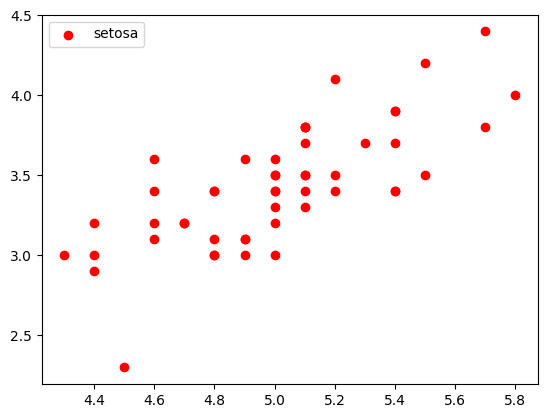

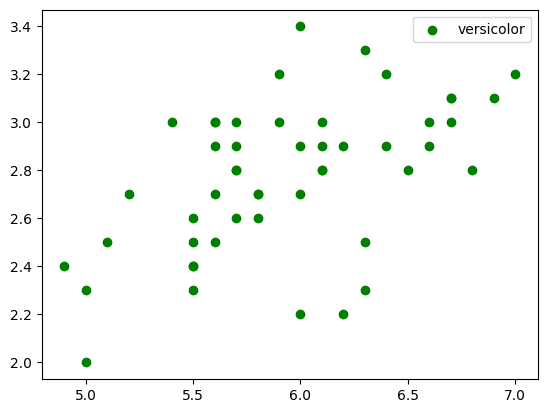

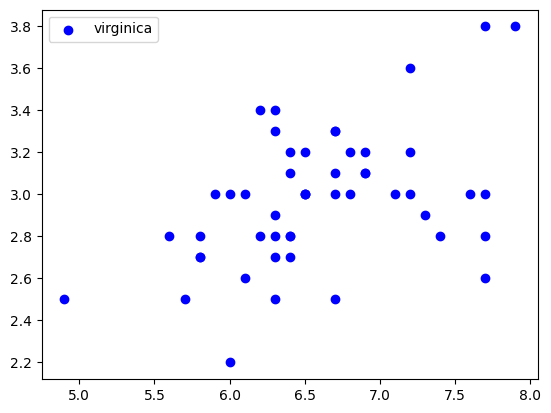

In [163]:
import matplotlib
import pylab as pl
def plot_2D(data, target, target_names):
    colors = "rgbcmykw" # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
        pl.legend()
        pl.show()

plot_2D(irisData.data, irisData.target, irisData.target_names)
